# wavelet_example 2

In [7]:
#numpy: manipulation de vecteurs/matrices...
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
import matplotlib.image as mpimg
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.sans-serif'] = ['Lucida Grande', 'Verdana']
mpl.rcParams["figure.autolayout"] = True
from matplotlib.ticker import MaxNLocator
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 ))

#fonction math
import math

from scipy import signal

In [8]:
def f(x):
    res = 2 * np.sin(6*np.pi*x)+15*np.abs(x-0.1)**0.2 -15*np.abs(x-0.8)**0.4 - 14.06*x
    if x>0.5:
        res +=3.
    return res

In [9]:
vf = np.vectorize(f)

In [10]:
xmin=0.4
xmax=0.6
fs=2**15
print("fs/2=:",fs/2)
NFFT=32
cut = 4
#window = np.hanning(NFFT) # default
window = signal.windows.boxcar(NFFT) # default

ts = np.arange(xmin,xmax,1./fs) # plus simple a comprendre qur linespace
print(ts.shape)
xts=vf(ts)
xts_bruit = xts + 0.5 *np.random.randn(len(xts))

#freqs[0]: donne la composante continue
freqs, tps, Zxx = signal.stft(xts_bruit, fs=fs, nperseg=NFFT,noverlap=0,
                              window=window, boundary=None,padded=False)
spec = np.abs(Zxx)
spmean=np.max(spec[1:-cut,:],axis=0)




fs/2=: 16384.0
(6554,)


/Users/dagoret/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


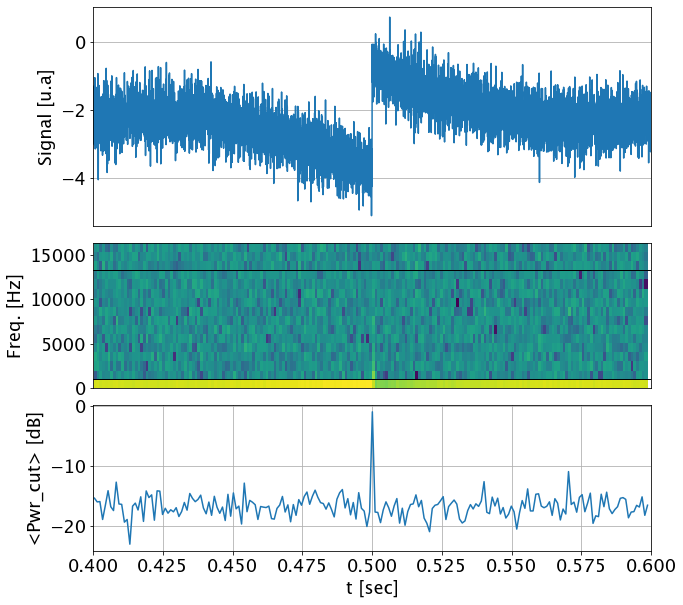

In [13]:
fig = plt.figure(figsize=(10,10))
gs = plt.GridSpec(3, 1, hspace=0.1, height_ratios=[1,2/3,2/3])
ax0 = fig.add_subplot(gs[0,0])
ax0.plot(ts,xts_bruit)
ax0.set_ylabel('Signal [u.a]')
ax0.set_xlim([xmin,xmax])
ax0.set_xticks([])
ax0.grid()
#
#
ax1 = fig.add_subplot(gs[1,0])
plt.pcolormesh(xmin+tps, freqs, 20*np.log10(spec))
ax1.plot([xmin, xmax], [freqs[1], freqs[1]], color='k', linestyle='-', linewidth=1)
ax1.plot([xmin, xmax], [freqs[-cut], freqs[-cut]], color='k', linestyle='-', linewidth=1)
ax1.set_ylabel('Freq. [Hz]')
ax1.set_xlim([xmin,xmax])
ax1.set_xticks([])
#
ax2 = fig.add_subplot(gs[2,0])
ax2.plot(xmin+tps,20.*np.log10(spmean))
ax2.set_xlim([xmin,xmax])
ax2.set_ylabel('<Pwr_cut> [dB]')
ax2.set_xlabel('t [sec]')
ax2.grid()
#plt.colorbar(cax,ax=ax2).set_label('Intensity [dB]')
plt.show() 